In [1]:
import os
import sys
import itertools

import pydocumentdb.documents as documents
import pydocumentdb.document_client as document_client
import pydocumentdb.errors as errors

import pandas as pd;pd.options.display.max_rows = 999
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

import view.config as cfg
import view.storage as st

import view.normalization as norm

import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

from IPython.core.display import HTML
from IPython.display import display

In [2]:
HOST = cfg.settings.host
MASTER_KEY = cfg.settings.master_key
DATABASE_ID = cfg.settings.database_id
COLLECTION_ID = cfg.settings.collection_id

#### 1. Fetch available resources

In [22]:
res_query = "select c.resourcename from c"
res_names = st.Reader(DATABASE_ID, COLLECTION_ID, res_query, cfg.settings)
res_names = np.unique([resource["resourcename"] for resource in res_names])


In [8]:
res_names = ["insufficients_offers"]

#### 2. Download Data from CosmosDB

In [9]:
data = {}
dividers = {}

for res_name in res_names:
    
    doc_query = "select * from c where c.resourcename = '{0}'".format(res_name)
    
    docs = st.Reader(DATABASE_ID, COLLECTION_ID, doc_query, cfg.settings)
    
    if not len(docs) == 0:
        df = pd.DataFrame([item for doc in docs for item in doc["data"]])
        data[res_name] = df
        
        dividers[res_name] = getattr(cfg.groups, docs[0]["apiname"])
    

#### 3. Basics Statistics

In [10]:
doto = norm.FindProbableFloat( data )
index_names = ["Resource Type","Resource Subtype","Value Type"]
df = norm.GetDescription( doto, dividers, res_names, index_names )
df

count freq  \
Resource Type        Resource Subtype Value Type                
insufficients_offers DOWNGRADED       direction      163  148   
                                      end_date       163    2   
                                      nature         163  138   
                                      start_date     163    2   
                                      updated_date   163    2   
                     WARNING          direction       40   30   
                                      end_date        40    1   
                                      nature          40   38   
                                      start_date      40    1   
                                      updated_date    40    2   

                                                                          top  \
Resource Type        Resource Subtype Value Type                                
insufficients_offers DOWNGRADED       direction                        UPWARD   
                                      end_date      2013-04-29T13:30:00+02:00   
                                      nature            BALANCE_SUPPLY_DEMAND   
                                      start_date    2015-03-20T09:00:00+01:00   
                                      updated_date  2015-03-20T06:00:00+01:00   
                     WARNING          direction                        UPWARD   
                                      end_date      2013-04-29T13:30:00+02:00   
                                      nature            BALANCE_SUPPLY_DEMAND   
                                      start_date    2013-06-16T05:30:00+02:00   
                                      updated_date  2013-02-10T16:25:00+01:00   

                                                   unique  
Resource Type        Resource Subtype Value Type           
insufficients_offers DOWNGRADED       direction         2  
                                      end_date        159  
                                      nature            2  
                                      start_date      159  
                                      updated_date    162  
                     WARNING          direction         2  
                                      end_date         40  
                                      nature            2  
                                      start_date       40  
                                      updated_date     39

In [429]:
doc_query = "select * from c where c.resourcename = 'actual_generations_per_unit' and c.data.start_date ='2013-02-10T16:25:00+01:00'"

docs = st.Reader(DATABASE_ID, COLLECTION_ID, doc_query, cfg.settings)

print docs

[]


In [7]:
data["peak_daily_margins"]
docs

[{u'ContinueTaskId': 0,
  u'CreateTaskId': 0,
  u'_attachments': u'attachments/',
  u'_etag': u'"0600d067-0000-0000-0000-59d794180000"',
  u'_rid': u'ibYqAPgyvgDgDAAAAAAAAA==',
  u'_self': u'dbs/ibYqAA==/colls/ibYqAPgyvgA=/docs/ibYqAPgyvgDgDAAAAAAAAA==/',
  u'_ts': 1507300376,
  u'actioncollection': u'scheduler',
  u'actionid': u'4de15ac4-8b39-4f28-b894-ac44a3e0eacf',
  u'actiontype': u'rte',
  u'apiname': u'balancing_capacity',
  u'data': [{u'available_value': 10099.8,
    u'end_date': u'2012-06-04T00:00:00+02:00',
    u'required_value': 2300,
    u'start_date': u'2012-06-03T22:00:00+02:00',
    u'type': u'EVENING',
    u'updated_date': u'2012-06-02T00:00:00+02:00'}],
  u'end_date': u'2012-06-04T00:00:00+02:00',
  u'id': u'40eaa33c-8dfa-49c3-9f14-0355b7d8fd79',
  u'resourcename': u'peak_daily_margins',
  u'start_date': u'2012-06-03T22:00:00+02:00'},
 {u'ContinueTaskId': 0,
  u'CreateTaskId': 0,
  u'_attachments': u'attachments/',
  u'_etag': u'"0600d267-0000-0000-0000-59d794180000"',


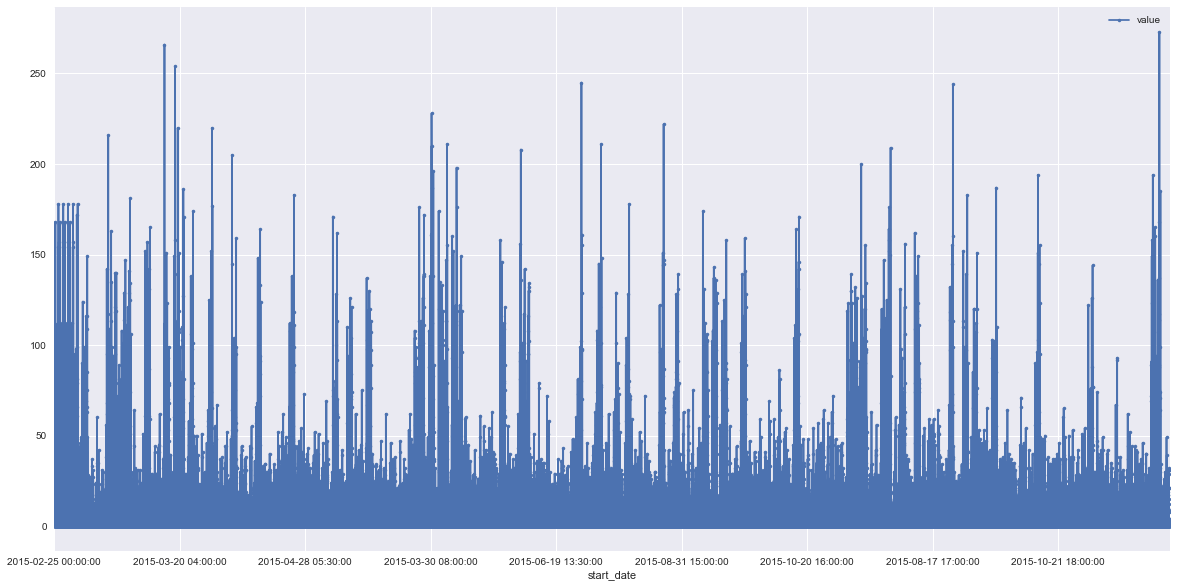

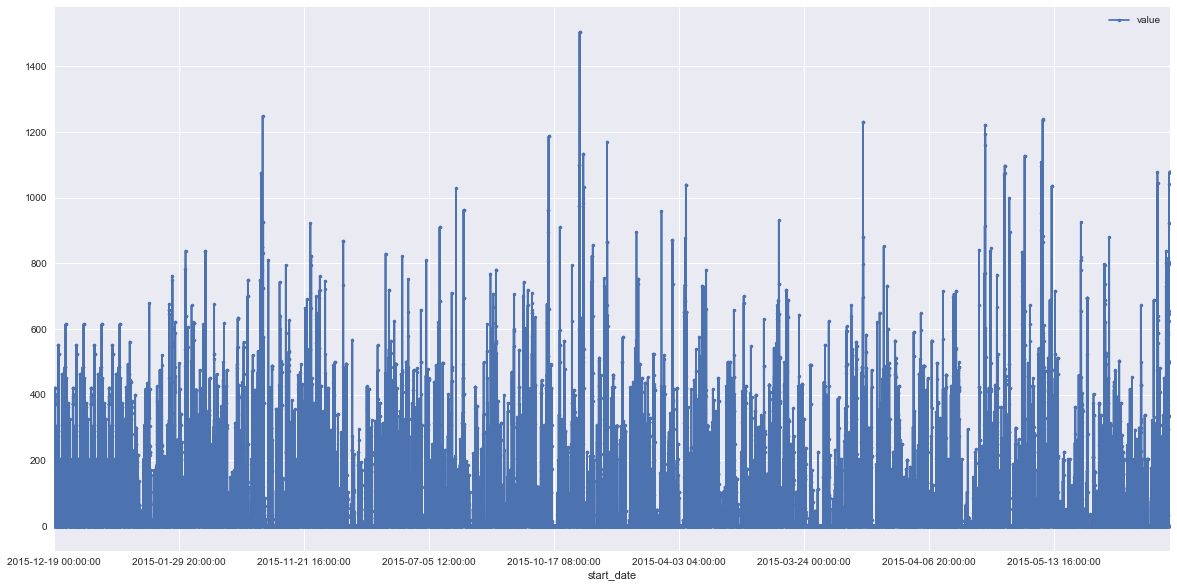

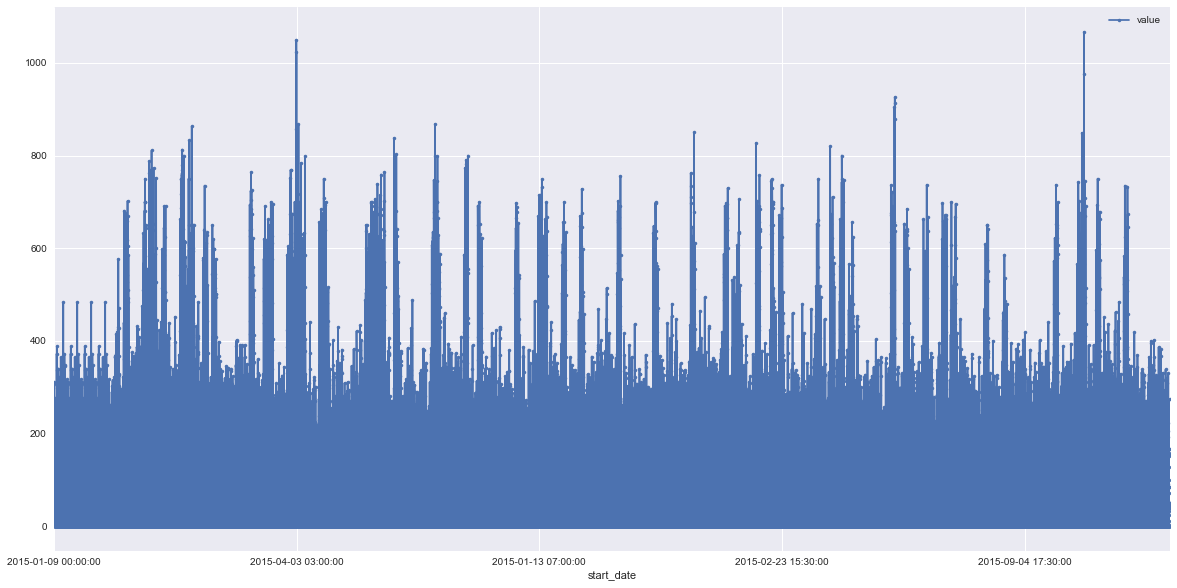

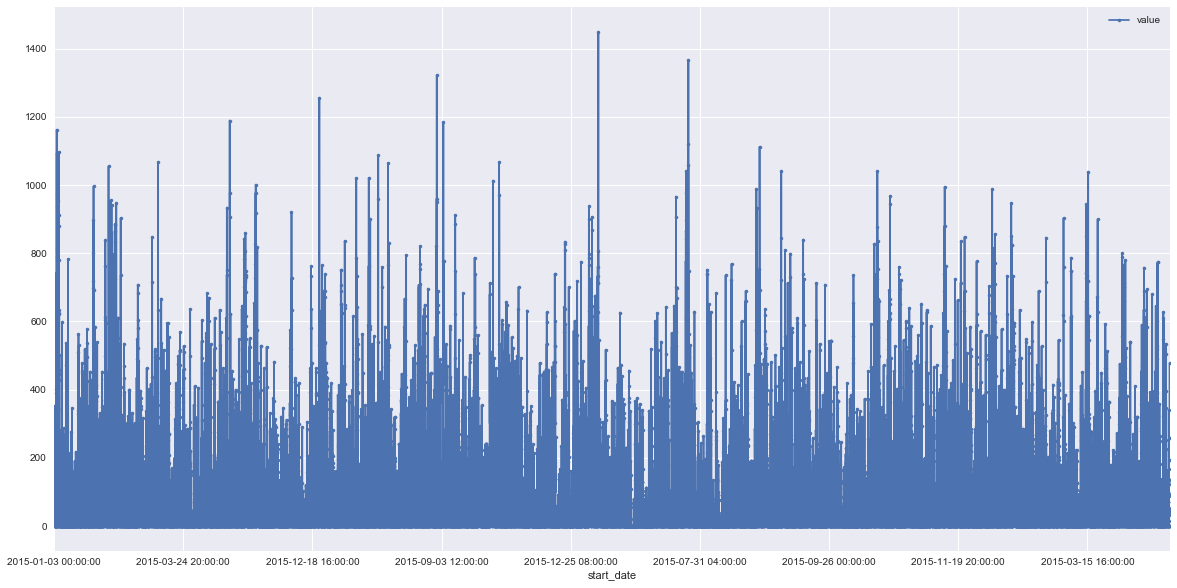

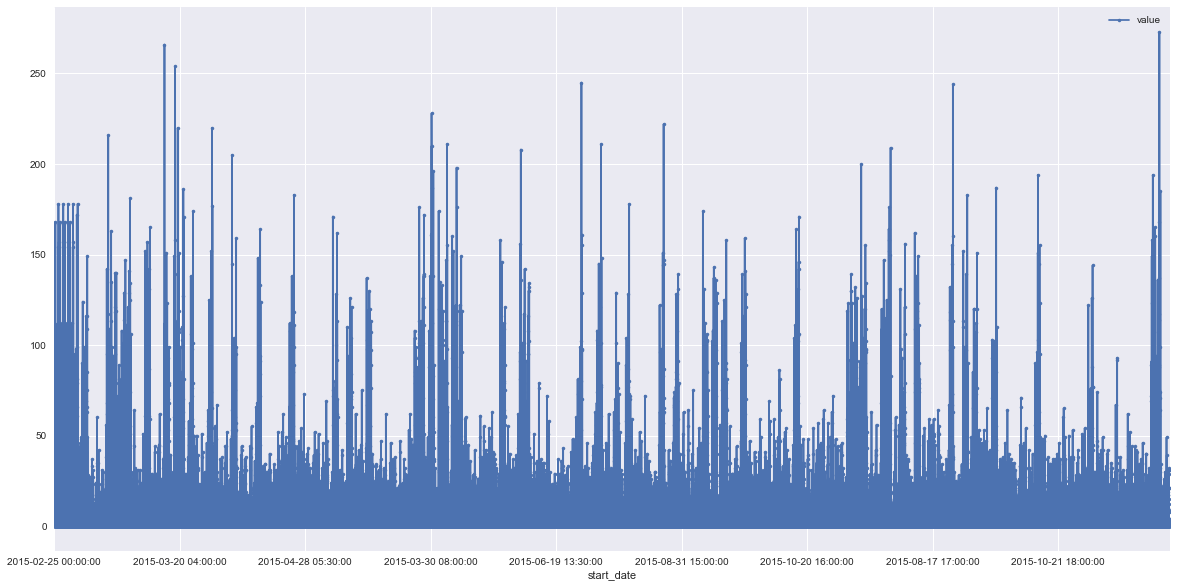

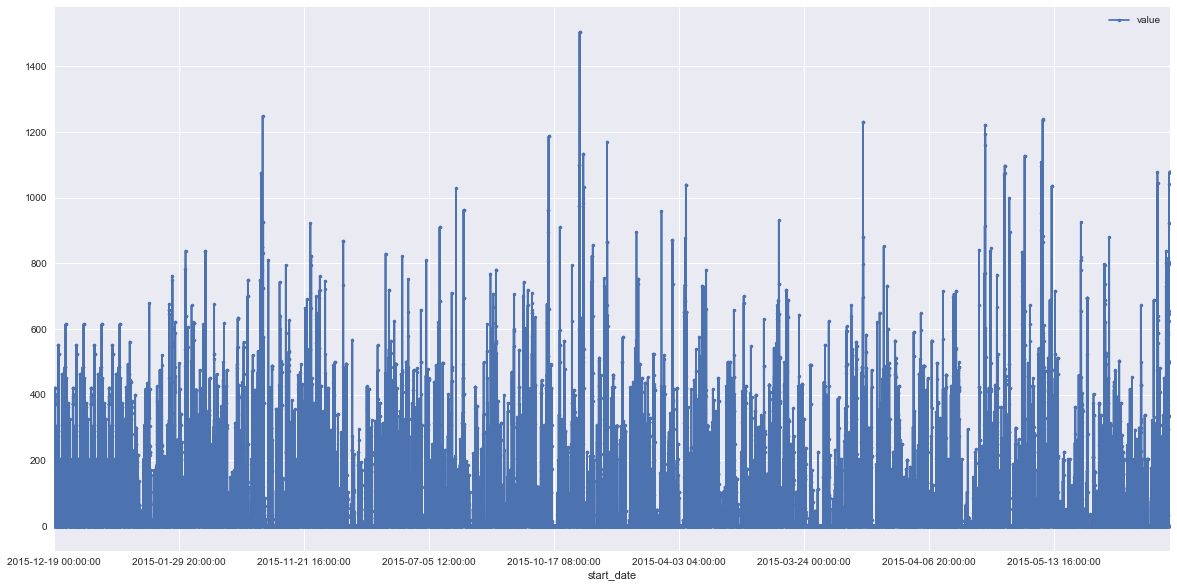

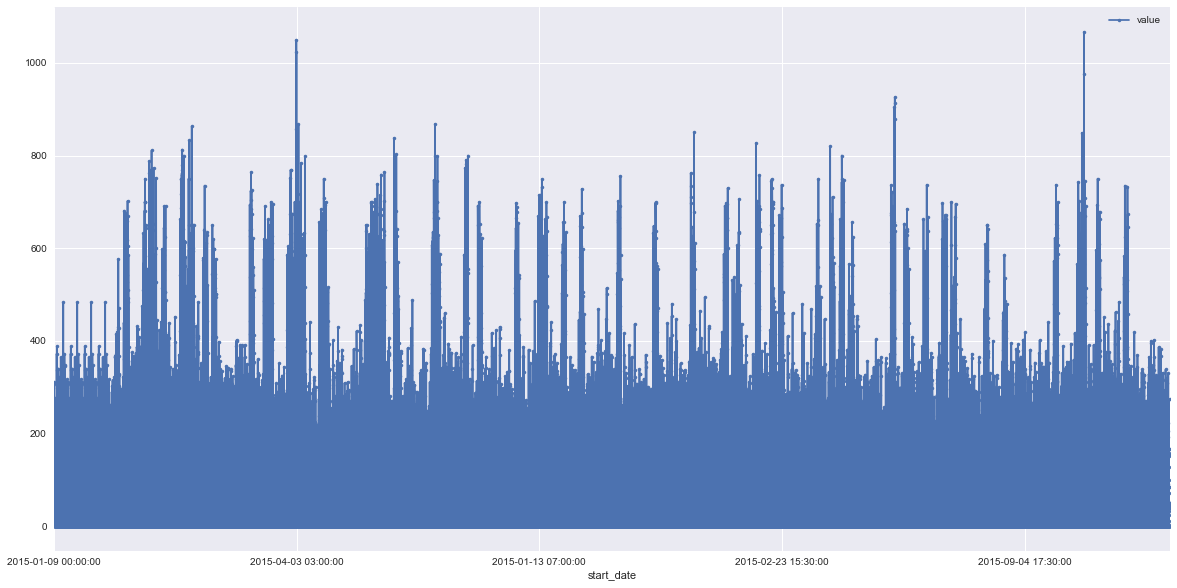

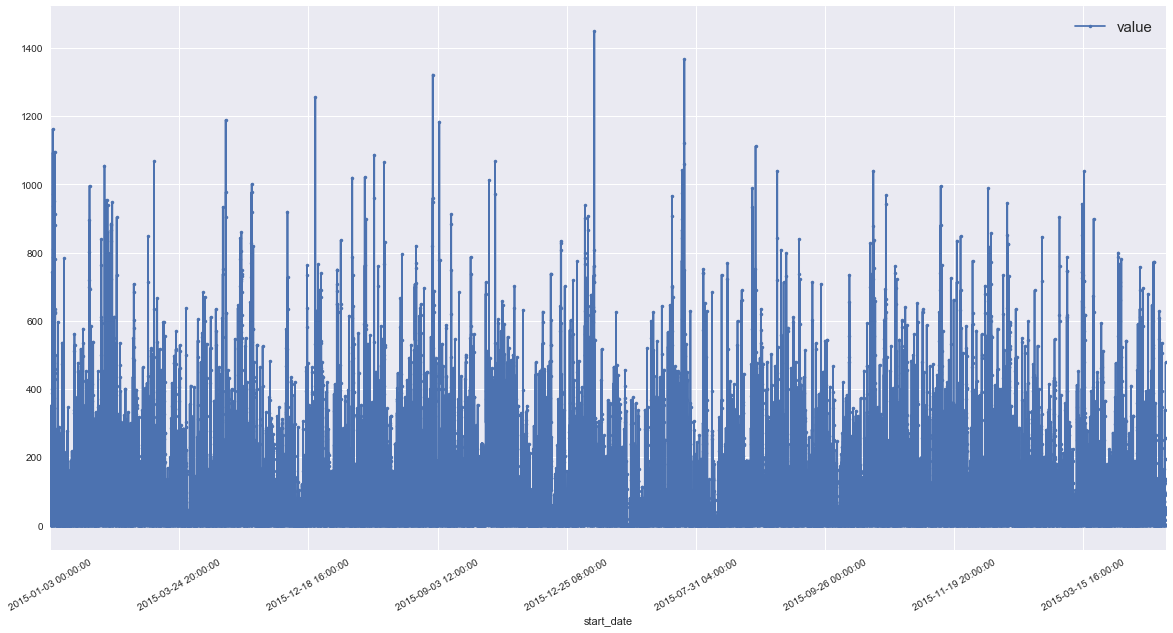

In [456]:

for res_name in res_names:
    
    if not data[res_name].empty:
        if (dividers[res_name] != None 
            and any(dividers[res_name] in s for s in data[res_name].columns.values)):
            groups = data[res_name].groupby([dividers[res_name]])
            groups.plot(x='start_date', y='value', marker='.',figsize=(20,10))
        else:
            data[res_name].plot(x='start_date', y='value', marker='.',figsize=(20,10))
    
    groups.plot(x='start_date', y='value', marker='.',figsize=(20,10))
    plt.xticks(rotation=30)
    plt.legend(fontsize=15)
    
plt.show()

In [22]:
# Provide the path to the yaml file relative to the working directory
display(HTML('''<style>
    .widget-label { min-width: 20ex !important; }
    .widget-text { min-width: 60ex !important; }
</style>'''))

#Toggle Code
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();

 } else {
 $('div.input').show();

 }
 code_show = !code_show
} 
//$( document ).ready(code_toggle);//commenting code disabling by default
</script>
<form action = "javascript:code_toggle()"><input type="submit" value="Toggle Raw Code"></form>''')